# Árbol de decisión con clasificación
El objetivo es clasificar la calidad el vino en función de las características.
Se usará __análisis de clasificación__ con el fin de capturar la relación entre las características y el nivel de calidad de los vinos.

author: Virginia Ordoño Bernier

date: January 2024

## Notas
Un árbol de decisión es un método de aprendizaje supervisado que puede utilizarse tanto para tareas de clasificación como para regresión. La idea central detrás de un árbol de decisión es dividir iterativamente el conjunto de datos en subconjuntos más pequeños basándose en las características de los datos, con el objetivo de hacer predicciones o tomar decisiones.

### 1. Carga de datos y creación del dataframe

In [2]:
import pandas as pd

csv = './data/winequality-red.csv'
data = pd.read_csv(csv)
df_wines = pd.DataFrame(data)
print(df_wines.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### 2. Preprocesamiento de datos

In [3]:
# To lowercase, delete "(cm)" and final "_" 
df_wines.columns = [col.lower().replace(' ', '_').rstrip('_') for col in df_wines.columns]

# Mostrar el DataFrame resultante
print(df_wines.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
# Checking Label column values
df_wines['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### 3. Análisis exploratorio para visualizar la distribución de las clases

c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

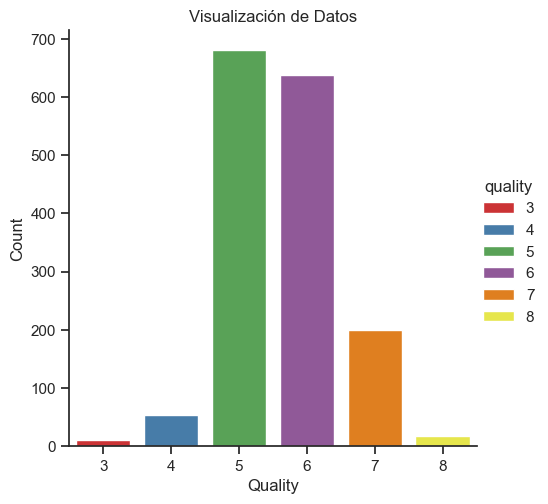

Instancias por clase
quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style='ticks') # line stlye
sns.catplot(x='quality', data=df_wines, kind='count', hue='quality', palette='Set1')
plt.title("Visualización de Datos")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
print('Instancias por clase')
print(df_wines.groupby('quality').size())

### 4. Preparación de los datos para el entrenamiento

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_wines, test_size=0.33, random_state=42)

# Reset index to maintain an order
train.reset_index(inplace = True)
test.reset_index(inplace = True)

print("Conjunto de entrenamiento:")
print(train.head())

print("\nConjunto de prueba:")
print(test.head())

Conjunto de entrenamiento:
   index  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0    548           12.4             0.350         0.49             2.6   
1    355            6.7             0.750         0.01             2.4   
2   1296            6.6             0.630         0.00             4.3   
3    209           11.0             0.300         0.58             2.1   
4    140            8.4             0.745         0.11             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    ph  \
0      0.079                 27.0                  69.0  0.99940  3.12   
1      0.078                 17.0                  32.0  0.99550  3.55   
2      0.093                 51.0                  77.5  0.99558  3.20   
3      0.054                  7.0                  19.0  0.99800  3.31   
4      0.090                 16.0                  63.0  0.99650  3.19   

   sulphates  alcohol  quality  
0       0.75     10.4        6  
1       0.61     

### 5. Validación cruzada: optimización de parámetros

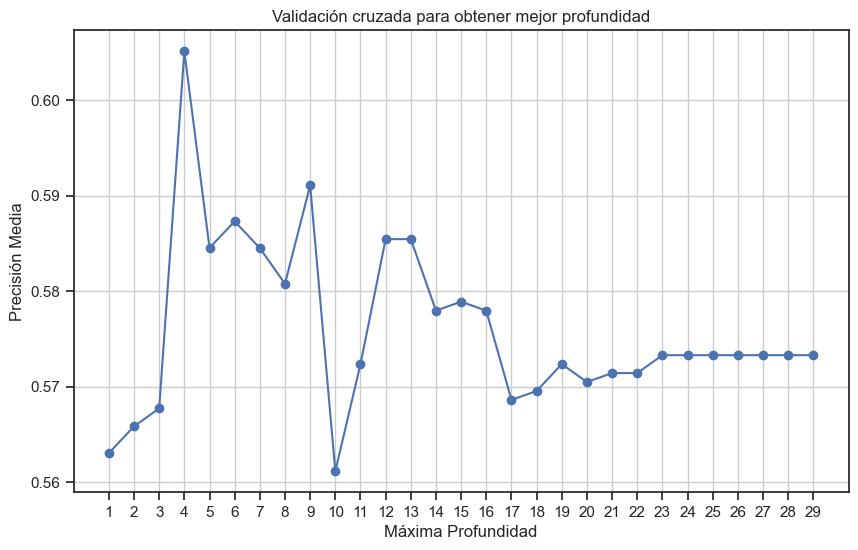

Mejor profundidad: 4
Mayor Precisión Media: 0.6051099837889206


In [7]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Supongamos que ya has dividido tus datos en train y test

cv = KFold(n_splits=4)

total_scores = []
best_depth = None
max_accuracy = 0.0

for i in range(1, 30):
    fold_accuracies = []
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)

    # Divide train and test groups
    for train_fold, test_fold in cv.split(train):
        f_train = train.iloc[train_fold] # train_fold index, selects a row. F_train is a new df 
        f_test = train.iloc[test_fold] # test_fold index, selects a row. F_test is a new df

        dt.fit(
            X=f_train.drop(['quality'], axis=1),  # thorugh the column
            y=f_train['quality']
        )
        X_test = f_test.drop(['quality'], axis=1)  # thorugh the column
        y_pred = dt.predict(X_test)

        # Evaluation
        accuracy = accuracy_score(f_test['quality'], y_pred)
        fold_accuracies.append(accuracy)
    
    # Calculate and store the average accuracy for the current depth
    avg_accuracy = np.mean(fold_accuracies)
    total_scores.append(avg_accuracy)
    
    # Check if the current depth results in a bigger accuracy
    if avg_accuracy > max_accuracy:
        max_accuracy = avg_accuracy
        best_depth = i

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), total_scores, marker='o', linestyle='-', color='b')
plt.title('Validación cruzada para obtener mejor profundidad')
plt.xlabel('Máxima Profundidad')
plt.ylabel('Precisión Media')
plt.xticks(range(1, 30))
plt.grid(True)
plt.show()

# Print the results
print(f"Mejor profundidad: {best_depth}")
print(f"Mayor Precisión Media: {max_accuracy}")


### 6. Creación y entrenamiento del modelo 
Usaremos tanto criterio entropía como índice gini

In [8]:
from sklearn.metrics import accuracy_score, classification_report

X_train = train.drop('quality', axis=1)
y_train = train['quality']
X_test = test.drop('quality', axis=1)
y_test = test['quality']

model_entropy = DecisionTreeClassifier(max_depth = best_depth, criterion = 'entropy')
model_gini = DecisionTreeClassifier(max_depth = best_depth, criterion = 'gini')

# Trainig
model_entropy.fit(X_train, y_train)
model_gini.fit(X_train, y_train)

# Prediction
y_pred_entr = model_entropy.predict(X_test)
y_pred_gini = model_gini.predict(X_test)

# Accuracy. Better for classification problems
accuracy = accuracy_score(test['quality'], y_pred_entr)
print(f'Precisión Entropía: {round(accuracy, 2)}')
accuracy = accuracy_score(test['quality'], y_pred_gini)
print(f'Precisión Índice Gini: {round(accuracy, 2)}')

# Classification Report
print("\nInforme de Clasificación Entropía:")
print(classification_report(test['quality'], y_pred_entr))
print("\nInforme de Clasificación Índice de Gini:")
print(classification_report(test['quality'], y_pred_gini))


Precisión Entropía: 0.53
Precisión Índice Gini: 0.54

Informe de Clasificación Entropía:
              precision    recall  f1-score   support

           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00        19
           5       0.57      0.83      0.68       217
           6       0.51      0.38      0.43       213
           7       0.39      0.26      0.31        70
           8       0.00      0.00      0.00         7

    accuracy                           0.53       528
   macro avg       0.30      0.33      0.30       528
weighted avg       0.49      0.53      0.50       528


Informe de Clasificación Índice de Gini:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.59      0.69      0.64       217
           6       0.50      0.57      0.53       213
           7       0.50      0.23      0.31        70
 

c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Visualizacion del árbol de decisión

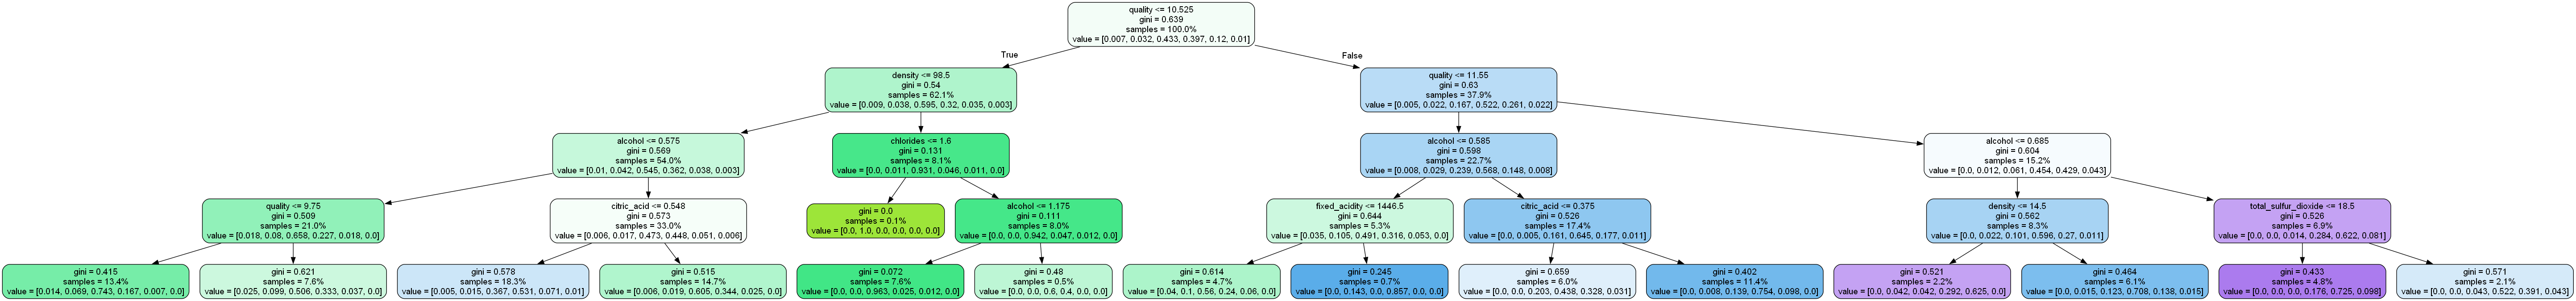

In [9]:
import pydot
from IPython.display import Image

from io import StringIO

from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(model_gini, out_file = dot_data, proportion = True, feature_names = df_wines.columns, rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### Importancia de las variables
La importancia de las variables se deriva del propio modelo, y se calcula observando cómo cada característica contribuye a reducir la impureza (o aumentar la pureza) de los nodos en el árbol de decisión durante el proceso de entrenamiento.

In [10]:
# X_train = train.drop('quality', axis=1)
# y_train = train['quality']

# # Gini criterio by default
# classifier = DecisionTreeClassifier(random_state=42)
# classifier.fit(X_train, y_train)

# Get importance
importances = model_gini.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Exclude column 'index' if exists
if 'index' in feature_importance_df['Feature'].values:
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'index']

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Informe de Importancia de las Variables:")
print(feature_importance_df)



Informe de Importancia de las Variables:
                 Feature  Importance
11               alcohol    0.505036
10             sulphates    0.196379
7   total_sulfur_dioxide    0.153799
2       volatile_acidity    0.086706
6    free_sulfur_dioxide    0.021897
4         residual_sugar    0.010943
1          fixed_acidity    0.000000
3            citric_acid    0.000000
5              chlorides    0.000000
8                density    0.000000
9                     ph    0.000000
